# Validating Model

1. Examining resized images
    1. Load validation data (images with shots).
    2. Resize images.
    3. Examine coordinates that should contain shots.
        1. Is the high attenuation coefficient preserved? How much has it decreased by?

In [24]:
# imports
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from scipy.ndimage import zoom
from paralleltomo import paralleltomo

def convert_to_ac(grayscale_im):
    """
    Converts a grayscale image (Numpy array) to an array of attenuation coefficients

    """
    grayScaleToAttCoeff = lambda x: (x/255)*30.32
    cFunc = np.vectorize(grayScaleToAttCoeff)
    return cFunc(grayscale_im)

resize_factor = 75/500

In [25]:
# Beginning with plank 1

# slice 1 (slice0.png)
# 1 lead shot
shot_coords = (63, 463)
# New shot coordinates after resizing
new_shot_coords = (round(shot_coords[0]*resize_factor), round(shot_coords[1]*resize_factor))
print(f"Old shot coordinates: {shot_coords}")
print(f"New shot coordinates: {new_shot_coords}")


Old shot coordinates: (63, 463)
New shot coordinates: (9, 69)


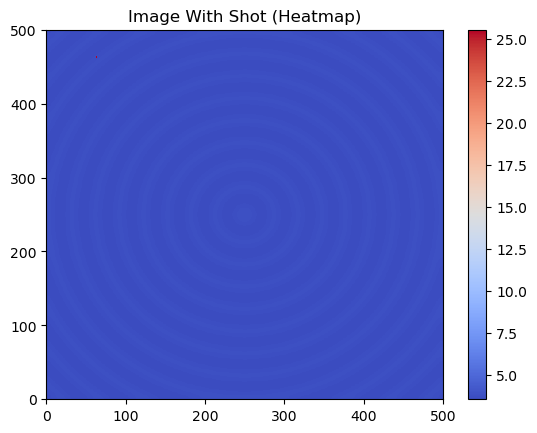

In [26]:
# Loading image, testing if above method is suitable
path_to_slice = "validation data generation/validation-data/plank1/slice0-withshot.png"

img = Image.open(path_to_slice)
# Convert the image to grayscale
img = img.convert('L')
im_array = np.array(img)

# Convert image to attenuation coefficient
im_AC = convert_to_ac(im_array)

# Displaying image (as heatmap)

heatmap = plt.pcolor(im_AC, cmap="coolwarm")
plt.colorbar(heatmap)
plt.title("Image With Shot (Heatmap)")
plt.show()

In [27]:
# Resizing image

resized_im = zoom(im_AC, (75/500,75/500), order=1, mode = "grid-constant")

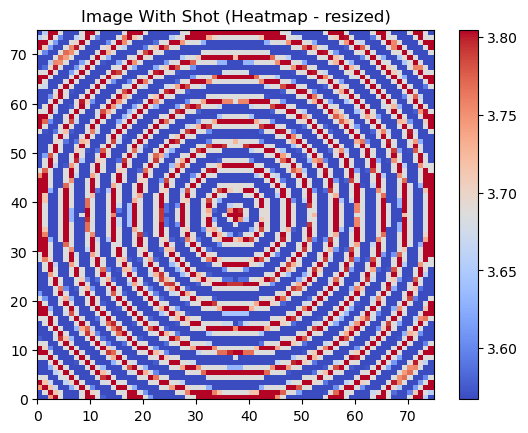

In [28]:
# Analysing resized image

heatmapresized = plt.pcolor(resized_im, cmap="coolwarm")
plt.colorbar(heatmapresized)
plt.title("Image With Shot (Heatmap - resized)")
plt.show()

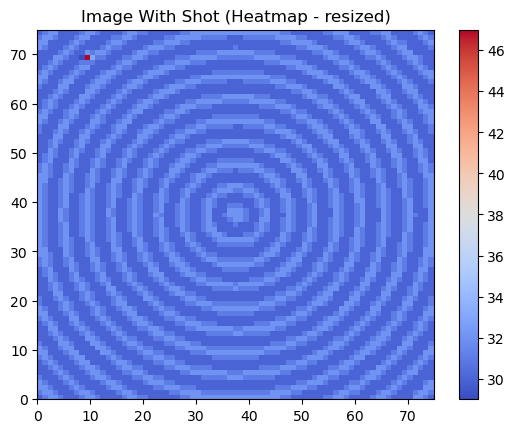

In [29]:
# resizing again, using PIL

resized_im_2 = img.resize((75, 75), Image.ANTIALIAS) 
im_array_2 = np.array(resized_im_2)
# Analysing resized image

heatmapresized_2 = plt.pcolor(resized_im_2, cmap="coolwarm")
plt.colorbar(heatmapresized_2)
plt.title("Image With Shot (Heatmap - resized)")
plt.show()

In [30]:
# Parameters to use
N = 75
theta = np.matrix(np.linspace(0, 180, 90)) 
p = 175
A = paralleltomo(N, theta, p)[0]

c:\ProgramData\miles\GitHubDesktop\app-2.9.11\Data-Structures-and-Algorithms-I\MathModellingDTU\Exam Project\paralleltomo.py:102: RuntimeWarning: divide by zero encountered in true_divide
  tx = (x - x0theta[j,0])/a


In [31]:
# Forward projection
x = np.ravel(resized_im_2)

b = np.matmul(A, x)

In [32]:
Q, R = np.linalg.qr(A)

In [33]:
def qr_sol(Q,R,b):
    y = np.dot(Q.T,b)
    n = len(y)
    x = np.zeros(n)

    for i in range(n-1,-1,-1):
        x[i] = y[i]
        for j in range(i+1,n):
            x[i] -= R[i,j] * x[j]
        x[i] /= R[i,i]
    return x

In [34]:

x_recreated = qr_sol(Q,R,b)

In [36]:
# reshaping x
x_recreated = x_recreated.reshape((75, 75))

In [37]:
x_recreated

array([[30., 31., 32., ..., 32., 31., 30.],
       [31., 32., 32., ..., 32., 32., 31.],
       [32., 32., 31., ..., 30., 32., 32.],
       ...,
       [32., 32., 30., ..., 30., 31., 32.],
       [31., 32., 32., ..., 31., 32., 31.],
       [30., 31., 32., ..., 32., 31., 30.]])

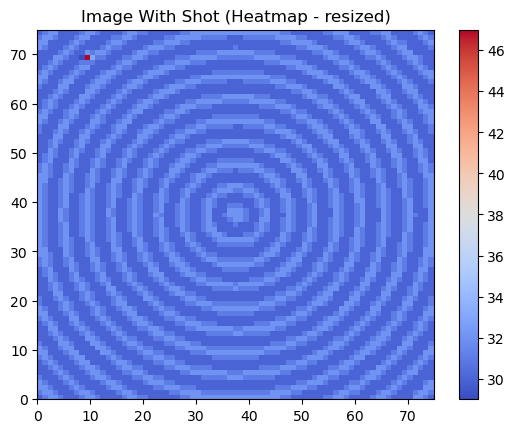

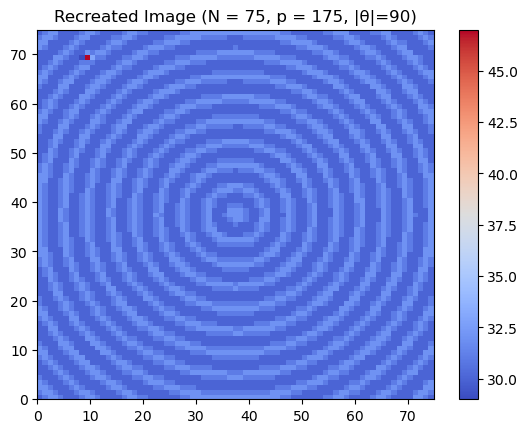

In [38]:
heatmapresized_2 = plt.pcolor(resized_im_2, cmap="coolwarm")
plt.colorbar(heatmapresized_2)
plt.title("Image With Shot (Heatmap - resized)")
plt.show()

heatmap_recreated = plt.pcolor(x_recreated, cmap="coolwarm")
plt.colorbar(heatmap_recreated)
plt.title("Recreated Image (N = 75, p = 175, |\u03B8|=90)")
plt.show()


Testing ze new image

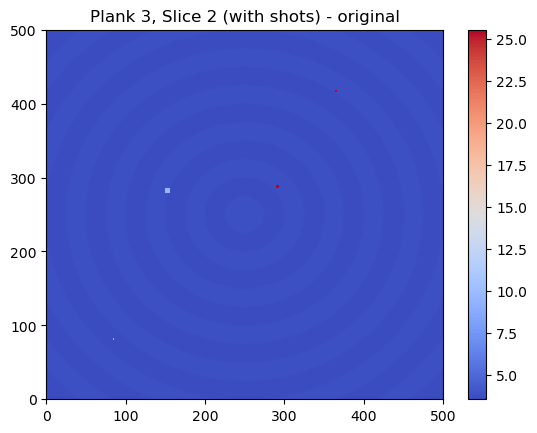

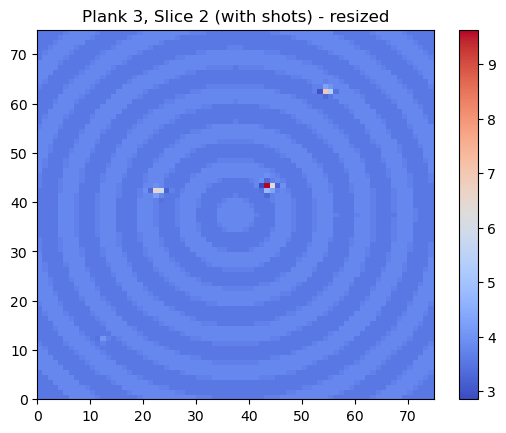

In [39]:
path_to_slice = "validation data generation/validation-data/plank3/slice2-withshots.png"

img = Image.open(path_to_slice)
# Convert the image to grayscale
img = img.convert('L')
original_im = np.array(img)
original_im = convert_to_ac(original_im)

resized_im = img.resize((75, 75), Image.ANTIALIAS) 
im_array = np.array(resized_im)

heatmap = plt.pcolor(original_im, cmap="coolwarm")
plt.colorbar(heatmap)
plt.title("Plank 3, Slice 2 (with shots) - original")
plt.show()



# Convert image to attenuation coefficient
im_AC = convert_to_ac(im_array)

# Displaying image (as heatmap)

heatmap = plt.pcolor(im_AC, cmap="coolwarm")
plt.colorbar(heatmap)
plt.title("Plank 3, Slice 2 (with shots) - resized")
plt.show()



Proceeding with recreation

In [81]:
original_shot_locations = {"steel1": (84, 81), "steel2": (150, 280), "lead1": (364, 416), "lead2":(290, 287)}
new_shot_locations = {}

for bullet, coord in original_shot_locations.items():
    new_shot_locations[bullet] = (round(coord[0]*resize_factor), round(coord[1]*resize_factor))

{'steel1': (13, 12), 'steel2': (22, 42), 'lead1': (55, 62), 'lead2': (44, 43)}

In [47]:
# Forward projection

# Making x vector

im_AC.shape
x = np.ravel(im_AC)
# Making b
b = np.matmul(A, x)

In [48]:
# Recreating x 

x_recreated = qr_sol(Q,R,b)

In [49]:
# Displaying image
im_recreated = np.reshape(x, (75, 75))

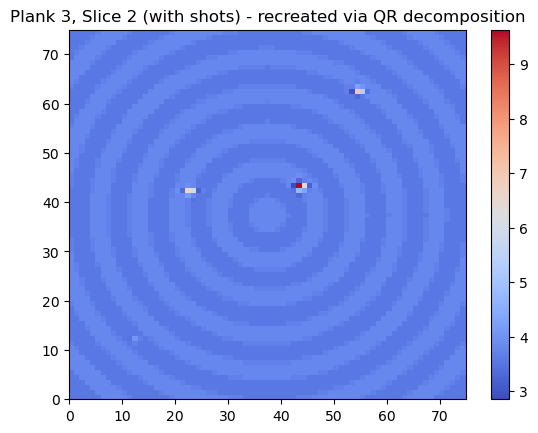

In [51]:

heatmap = plt.pcolor(im_recreated, cmap="coolwarm")
plt.colorbar(heatmap)
plt.title("Plank 3, Slice 2 (with shots) - recreated via QR decomposition")
plt.show()

In [72]:
def qr_sol(b,Q=Q,R=R):
    y = np.dot(Q.T,b)
    n = len(y)
    x = np.zeros(n)

    for i in range(n-1,-1,-1):
        x[i] = y[i]
        for j in range(i+1,n):
            x[i] -= R[i,j] * x[j]
        x[i] /= R[i,i]
    return x

# adding noise from mean and stanard deviation
def add_noise(b,lower_bound = 0.2,upper_bound = 0.3):

    std = np.sqrt(np.mean(b)*(1-np.random.uniform(lower_bound, upper_bound))/(len(b)-1))
    noise = np.random.normal(0, std, b.shape)
    noisy_b = b + noise
    
    return noisy_b

def convert_to_ac(grayscale_im, element):
    """
    Converts a grayscale image (Numpy array) to an array of attenuation coefficients

    """
    m_ac = {"lead": 30.32, "steel": 7.938406}
    grayScaleToAttCoeff = lambda x: (x/255)*m_ac[element]
    cFunc = np.vectorize(grayScaleToAttCoeff)
    return cFunc(grayscale_im)

def validation_process(filepath, element="lead", resize_factor=75/500, A=A):

    img = Image.open(filepath)
    # Convert the image to grayscale
    img = img.convert('L')
    im_array = np.array(img)
    # Convert image to attenuation coefficient
    im_AC = convert_to_ac(im_array, element)

    # Plotting original image
    heatmap = plt.pcolor(im_AC, cmap="coolwarm")    
    plt.title("Original Image (before resizing)")
    plt.show()

    # Resizing
    resized_im = img.resize((75, 75), Image.ANTIALIAS)
    resized_im = convert_to_ac(resized_im, element)

    # Displaying resized
    heatmap = plt.pcolor(resized_im, cmap="coolwarm")    
    plt.title("Original Image (after resizing)")
    plt.show()

    # Proceeding with forward projection
    x_original = np.ravel(resized_im)
    b = np.matmul(A, x_original)

    # Adding noise to b
    noisy_b = add_noise(b)
    
    # recreate x
    x_recreated = qr_sol(noisy_b)

    recreated_im =  np.reshape(x_recreated, (75, 75))

    # Displaying recreated image

    heatmap = plt.pcolor(recreated_im, cmap="coolwarm")    
    # plt.colorbar(heatmap)
    plt.title("Recreated Image (N = 75, p = 175, |\u03B8|=90)")
    plt.show()

    return im_AC, resized_im, recreated_im

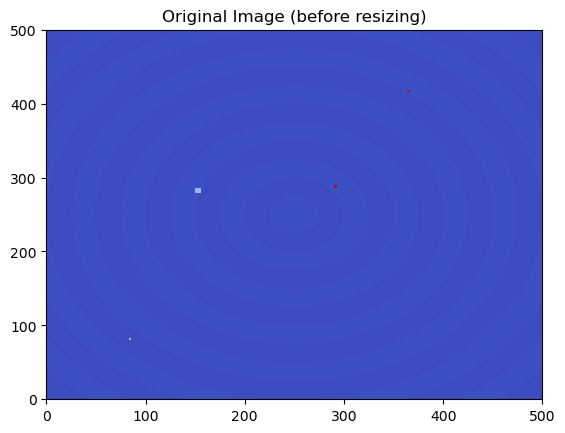

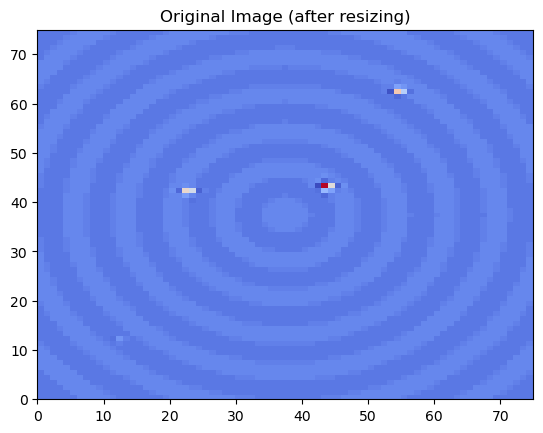

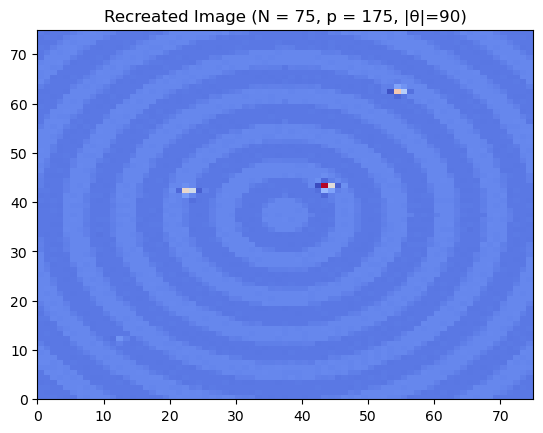

In [71]:
original1, resized_1, recreated_1 = validation_process("validation data generation/validation-data/plank3/slice2-withshots.png")

In [82]:
print(original_shot_locations)
print(new_shot_locations)

{'steel1': (84, 81), 'steel2': (150, 280), 'lead1': (364, 416), 'lead2': (290, 287)}
{'steel1': (13, 12), 'steel2': (22, 42), 'lead1': (55, 62), 'lead2': (44, 43)}


In [83]:
# Checking original image

s2 = original_shot_locations["steel2"]
# print(f"Attenuation Coefficient of steel in original image: {original_im[s2[1], s2[0]]}")

# resized image

s2_new = new_shot_locations["steel2"]
# print(s2_new)

# print(f"Attenuation Coefficient of steel in resized image: {resized_1[s2_new[1], s2_new[0]]}")

# # recreated image

# print(f"Attenuation Coefficient of steel in recreated image: {recreated_1[s2_new[1], s2_new[0]]}")

Attenuation Coefficient of steel in original image: 9.749960784313727
Attenuation Coefficient of steel in resized image: 6.539607843137255
Attenuation Coefficient of steel in recreated image: 6.536706154314576


#### Analysing Plank 3, slice2.png

In [92]:
new_shot_locations


{'steel1': (13, 12), 'steel2': (22, 42), 'lead1': (55, 62), 'lead2': (44, 43)}

In [97]:
steel1_pixel = recreated_1[13, 12]
steel2_pixel = recreated_1[22, 42]
lead1_pixel = recreated_1[55, 62]
lead2_pixel = recreated_1[44, 43]
steel1_pixel, steel2_pixel, lead1_pixel, lead2_pixel

(3.56633778960506, 3.781651771534308, 3.8046170259170644, 3.3224995418296968)

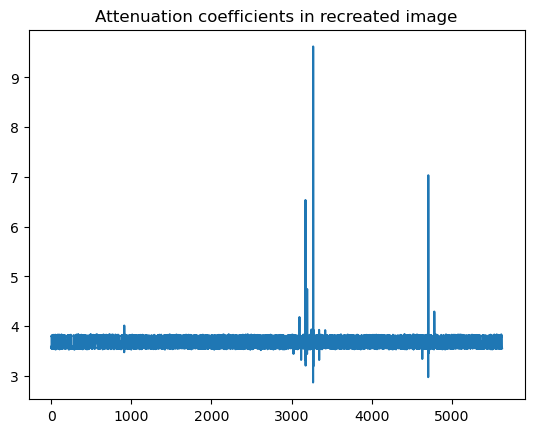

In [102]:
np.mean(recreated_1)
unravelled_x = np.ravel(recreated_1)
plt.plot([i for i in range(len(unravelled_x))], unravelled_x)
plt.title("Attenuation coefficients in recreated image")
plt.show()

In [122]:
from scipy.stats import ttest_ind_from_stats

mean = np.mean(unravelled_x)
std = np.std(unravelled_x, ddof=1)

# calculate the t-statistic and p-value for a two-sample t-test
t_stat, p_val = ttest_ind_from_stats(mean, std, len(unravelled_x), mean, std, len(unravelled_x))

# define a significance level (alpha) of 0.05
alpha = 0.01

# use numpy.where() to return the indices of values that are statistically different from the mean
# indices = np.where((unravelled_x < mean - t_stat * std / np.sqrt(len(unravelled_x)) * alpha) or (unravelled_x > mean + t_stat * std / np.sqrt(len(unravelled_x)) * alpha))


[3097, 3172, 3173, 3193, 3194, 3268, 3269, 4704, 4705, 4779]


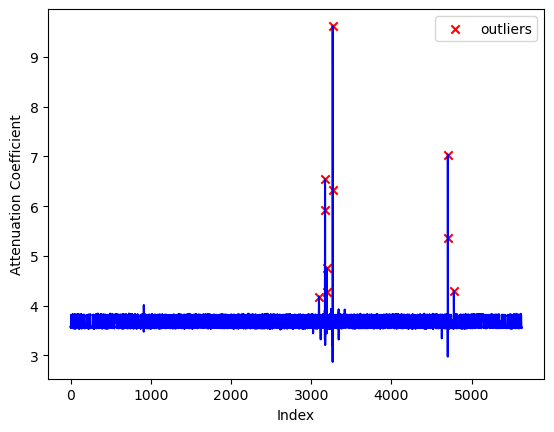

In [133]:
different_indices = []

median = np.median(unravelled_x)

# Calculate the 25th and 75th percentiles
q1, q3 = np.percentile(unravelled_x, [25, 75])

# Calculate the interquartile range (IQR)
iqr = q3 - q1


for i, val in enumerate(unravelled_x):
    
    if val > median+1.5*iqr:
        different_indices.append(i)


print(different_indices)

plt.scatter(different_indices, [unravelled_x[i] for i in different_indices], c="r", marker="x", label="outliers")
plt.plot(unravelled_x, c="b")
plt.ylabel("Attenuation Coefficient")
plt.xlabel("Index")
plt.legend()
plt.show()
